In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 34.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.8 MB/s 
     |████████████████████████████████| 5.3 MB 53.3 MB/s 
     |████████████████████████████████| 441 kB 65.8 MB/s 
     |████████████████████████████████| 1.6 MB 46.3 MB/s 
     |████████████████████████████████| 212 kB 71.6 MB/s 
     |████████████████████████████████| 115 kB 71.6 MB/s 
     |████████████████████████████████| 163 kB 73.8 MB/s 
     |████████████████████████████████| 127 kB 72.7 MB/s 
     |████████████████████████████████| 115 kB 73.2 MB/s 
     |████████████████████████████████| 7.6 MB 48.1 MB/s 
Mounted at /content/gdrive


# Lesson 1
In this notes series I will go through fastai course 2022 and also the book of *Deep Learning for Coders with Fastai and PyTorch* side by side. The way I build this seires of blog posts does not respect the order of which Jeremy build the course v5, the notebook is more influenced by **The Book** since we need to read it anyway in order to answear the questionnaire at the end of each Lesson.  
Hope you enjoy the Walk!

## Brief History of Neural Network

- In **1943** Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, both devoloped a concept called *Artificial Neuron* which is seen today as the first theorotical demonstration of a machine that's "..*capable of perceiving, recognizing and identifying its surrondings*"    
- In the **50's** Frank Rossenblatt devoloped a device based on the principiles of Artificial Neuron
   - Rosenblatt invented **The Perceptron** which was capable of recognizing simple shapes and patterns  
- In **1969** Marvin minsky write a book called **Perceptrons** where he showed that Perceptron limits of solving critical math problem


### Parallel Distributed Processing (PDP)
- After a long winter of Deep Learning, a group of researchers at MIT released a papper in **1986** released the most influencial papper in history of Neural Network  
- Authors claimed that PDP approach was closer to how human brain works  
- PDP require some enviroments elements:  
   
   - Set of processing units  
   - A state of activation  
   - An output function for each unit  
   - Pattern of connectivity among units  
   - Propagation rule for propagating patterns of activities through the network of connectivities  
   - An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit  
   - Learning rule whereby patterns of connectivity are modified by experience  
   - An environment within which the system must operate



### 1980's and 90's
- During this epoch researcher started to build models with 2 layers of neurons  
- We saw real world application of Deep Learning  

## Top to bottom learning approach

- Start with the end point 

   - Build a foundation of intuition through application then build on it with theory
   - Show students how individuals pieces of theory are combined in a real-world application

- Teach through examples

  - Provide a context and a purpose for abstract concepts



### What is Machine Learning?  

**Traditional Programming:**  
- It's hard to explicitly code hard tasks specialy when you don't know the exact steps  

![a-traditional-program.png](1.png)



**Machine Learning**  
- A program that need to be showed examples of the desired tasks so it can *Learn* from them  
   - Demand sufficient amount of examples(Data)  
- In 1949 Arthur Samuel manage to build a machine that can play checker
   - This work introduced multiple concepts to the world of machine learning:
     - The idea of a **weight assignment**  
     - The fact that every weight assignment has some **actual performance**  
     - The requirement that there be an **automatic means** of testing that performance  
     - The need for a **mechanism** (i.e., another automatic process) for improving the performance by changing the weight assignments  
     - Update the weight values based on the performance with the current values  





![program-using-weight-assignments.png](2.png)

 >***A system that used Weight Assignment***

![training-a-machine-learning-model.png](3.png)
>***Training Machine Learning model with help of weights updating***

![using-a-trained-model.png](4.png)
>***Using the trained model as program***

**Now Let's Build Our First Model!**

## First Deep Learning Model: It's a Bird!

### Import Dependencies

In [2]:
#Import fastai library
#Import fastai computer vision library 
from fastbook import *
from fastai.vision.all import *


### Start working with Data

In [3]:
# Here we use search_images_ddg in order to download an url from ddg
# search engine accornding to the keyword we choose: birds photo
urls = search_images_ddg('birds photo', max_images=1)
len(urls), urls[0]

(1,
 'https://www.wallpapergeeks.com/wp-content/uploads/2014/02/Colorful-Bird-Perched-Wallpaper.jpg')

In [4]:
# download the photo from the url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)


Path('bird.jpg')

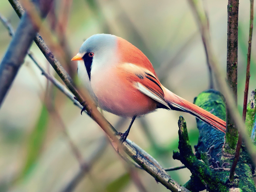

In [5]:
# then show it
im = Image.open(dest)
im.to_thumb(256,256)

Now we will do the same etapes we did with `bird.jpg` image but with forest picture

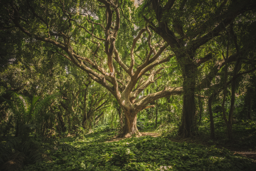

In [6]:
# Download the url, download the image then open it
download_url(search_images_ddg('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

The idea here is to build a model that can classify pictures of birds and forests accuratly, but first we need to build the Dataset

In [7]:
# create 2 directories, one for birds and other for forest, then do the same etapes we did earlier,
# download the urls then the images
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)


Since we are dowlnloading images from the web, there is a chance that some of them are corrupted, so we need to clean the dataset from them

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

* Now we have two directories : 
  - birds
  - forests
* As we saw before, machine learning model needs to be feed many examples in order to learn from them.
* These examples are the images of birds and forests in our case
* We need to tell the model bunch of informations about our data before the training process, this will be done with help of **DataBlock**  

### Creating DataBlock and DataLoaders
Now we need to build **`DataBlock`** in order to feed the dataset to the model for the training.it's basically set of rules of how to organize the dataset for the model.  
*`I will write a BlogPost about this concept later`*     
There's also the concept of **`DataLoaders`** which is an iterator class that load data to the model according to the set of rules that we set earlier while creating **DataBlock**

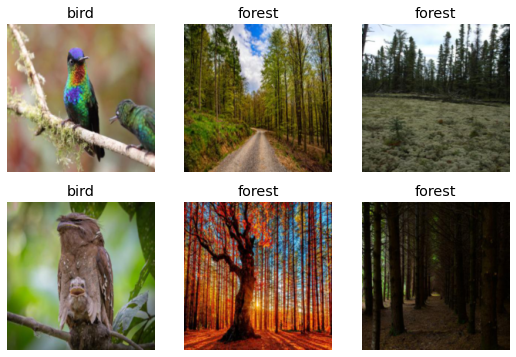

In [9]:
# create the dataBlock
# tell the model what kind of data we'r dealing with
# how to get the data
# how to create validation and training set
# how to get the labels
# how to set tranformers(items in this case)
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

### Training the Model 
Now we are ready to train our model and see if we could classify photo of birds and forests  
The model we will use here is `resenet18` which is a famous model that's used widely among computer vision classification problem, 18 stands for how many layers does the model have.  
fastai comes with `fine_tune()` which uses the best practices of fine tuning process.

In [12]:
learn =  vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.550929,2.057105,0.447368,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.084728,0.225560,0.092105,00:02
1,0.045721,0.024148,0.000000,00:02
2,0.031065,0.012299,0.000000,00:02


* With help of fastai library, and less than 20 lines of code we managed to build a model that can predict images of birds and forests with accuracy of 100%!


### Fine Tuning

is a process where we start with a model that has already be trained and we use it on our problem and on our dataset, this operation needs to adapt the pre-trained model by a bit so it fit our system   
This approach can save us money and time, all we need to do is adapt the pre-trained model and take advantage of set of **weights** and use them in our problem  
![The-transfer-learning-and-fine-tuning-techniques-used-in-the-development-of-the-proposed.png](5.png)

### Learner
In Fastai we have the `Learner` which takes 2 things(For now!): firsly the Dataset, and secondly the Model.  
Because Deep Learning is more mature now,there's a small group of Architecture that can be used in nearly any problem, that's why the actual work of deep learning practionaire is to work on data preparation, and model deploying, more than anything else.  
This is why Fastai integrated a famous library **`Timm`** which collect all SOTA (State Of The Art) computer vision models.


### Visualizing layers of a trained neural network 

- It is possible to inspect deep learning models and get  insights from them  
  - can still be challenging to fully understand
- Visualizing and Understanding Convolutional Networks [paper](https://arxiv.org/abs/1311.2901)
  - published by PhD student Matt Zeiler and his supervisor Rob Fergus in 2013 
  - showed how to visualize the neural network weights learned in each layer of a model
  - discovered the early layers in a convolutional neural network recognize edges and simple patterns which are     combined in later layers to detect more complex shapes
- We will see this paper in details later, but for now we could show the model architecture.

In [11]:
# show the model architecture
m = learn.model
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### Other Deep Learning Applications  

- Image Segmentation

   - training a model to recognize the content of every single pixel in an image

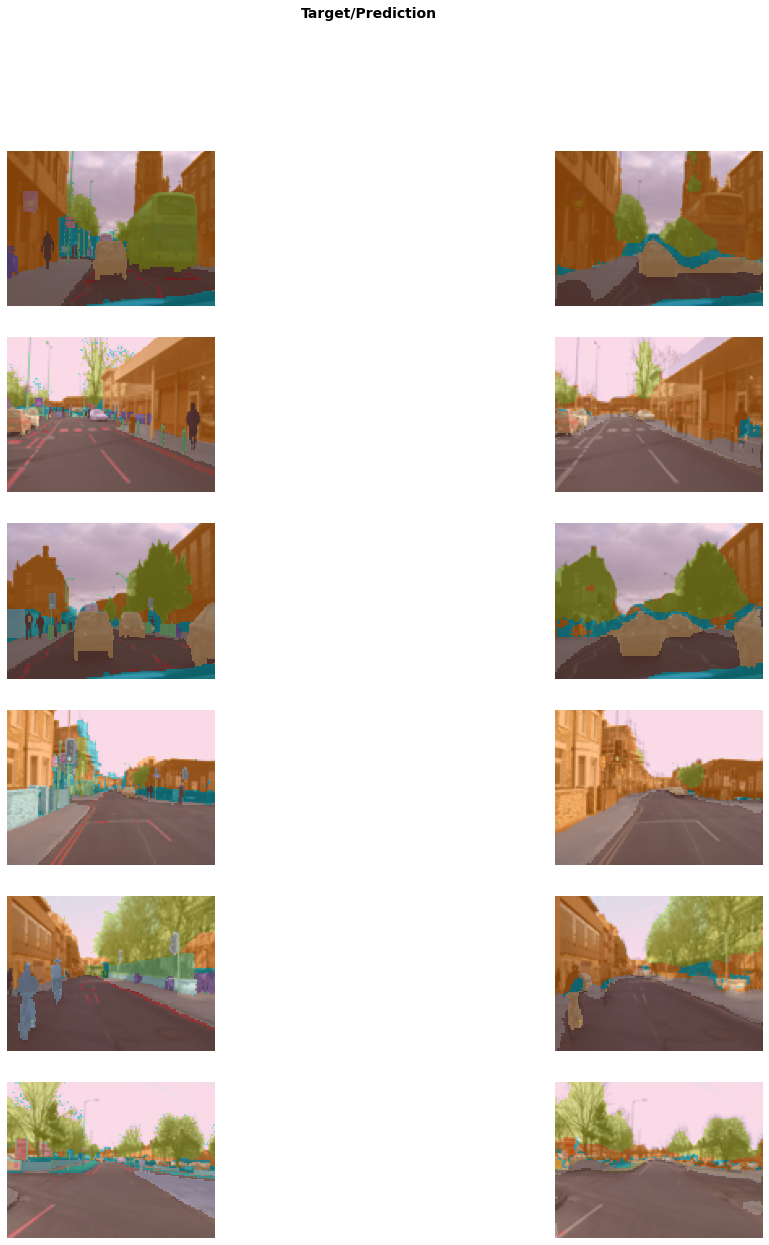


- Natural Language Processing (NLP)

  -  generate text
  -  translate from one language to another
  -  analyze comments
  -  label words in sentences  


- Tabular Data

  -  data that in in the form of a table
        - spreedsheets
        - databases
        - Comma-separated Values (CSV) files
  -  model tries to predict the value of one column based on information in other columns  


- Recommendation Systems

    - model tries to predict the rating a user would give for something
  

